# Extraire les fréquences fondamentales

Nous testons ici différentes méthodes implémentées en Python pour l'extraction des fréquences fondamentales (PDA : https://en.wikipedia.org/wiki/Pitch_detection_algorithm). Nous listons :

* Aubio (module pitch) : https://github.com/aubio/aubio
* Essentia (PredominantPitchMelodia) : http://essentia.upf.edu/documentation/reference/std_PredominantPitchMelodia.html
* Essentia (PitchYin) : http://essentia.upf.edu/documentation/reference/std_PitchYin.html
* Essentia (PitchYinFFT) : http://essentia.upf.edu/documentation/reference/std_PitchYinFFT.html


Soit le fichier :

In [1]:
path = "/Users/anas/AUDIO/Barraq/P1.wav"

## Aubio

La détection des f0 dans le package aubio se base sur...

In [2]:
def aubio(path):
    #import timeside
    from timeside.core import get_processor
    file_decoder = get_processor('file_decoder')(path, start=0)
    aubio_pitch = get_processor('aubio_pitch')()
    pipe = (file_decoder | aubio_pitch)
    pipe.run()
    res_pitch = aubio_pitch.results['aubio_pitch.pitch']
    return res_pitch.data

## Essentia

### L'algorithme Melodia

L'algorithme Melodia, implémenté dans Essentia sous la fonction PredominantMelody(), est plus robuste dans un contexte musical complexe, où l'enregistrement n'est pas monodique.

In [3]:
def predominant(path,minFrequency=80,maxFrequency=600):
    """Extract fondamental frequencies (f0) using PredominantMelody() from the Essentia package (v. 2.0.1).

    Args:
        path (str): the absolute path of the audio .wav file.
        minFrequency: the minimum frequency for PredominantMelody().
        maxFrequency: the maximum frequency for PredominantMelody().

    Return:
        file (str): the path of the .txt file where frequencies were written. Zeros pitches are replaced by NaN values.
    """

    from essentia.standard import MonoLoader,PredominantMelody

    audio = MonoLoader(filename = path)() # creation de l'instance
    melodie = PredominantMelody(minFrequency=minFrequency, maxFrequency = maxFrequency) # creation de l'instance
    pitch, confidence = melodie(audio)
    return pitch

In [34]:
def Yin(path,minFrequency=80,maxFrequency=600):
    """Extract fondamental frequencies (f0) using PredominantMelody() from the Essentia package (v. 2.0.1).

    Args:
        path (str): the absolute path of the audio .wav file.
        minFrequency: the minimum frequency for PredominantMelody().
        maxFrequency: the maximum frequency for PredominantMelody().

    Return:
        file (str): the path of the .txt file where frequencies were written. Zeros pitches are replaced by NaN values.
    """

    from essentia.standard import MonoLoader,PitchYin

    audio = MonoLoader(filename = path)() # creation de l'instance
    melodie = PitchYin(minFrequency=minFrequency, maxFrequency = maxFrequency) # creation de l'instance
    pitch, confidence = melodie(audio)
    return pitch

In [24]:
%matplotlib inline
def plot(freqs,hopSize = 128,frameSize = 2048,sampleRate = 44100):
    import matplotlib.pyplot as plt
    n_frames = len(freqs)

    plt.plot(range(n_frames), freqs, 'bo')
    n_ticks = 10
    xtick_locs = [i * (n_frames / 10.0) for i in range(n_ticks)]
    xtick_lbls = [i * (n_frames / 10.0) * hopSize / sampleRate for i in range(n_ticks)]
    xtick_lbls = ["%.2f" % round(x,2) for x in xtick_lbls]
    plt.xticks(xtick_locs, xtick_lbls)
    plt.ylim(0,450)

In [5]:
#int(X1.audio_metadata.duration*X1.data_object.frame_metadata.samplerate/X1.data_object.frame_metadata.blocksize*2)

In [35]:
x1 = aubio(path)
x2 = predominant(path)
x3 = Yin(path)

NameError: global name 'PitchYin' is not defined

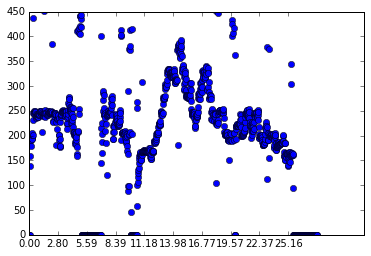

In [30]:
plot(x1,hopSize = 1024)

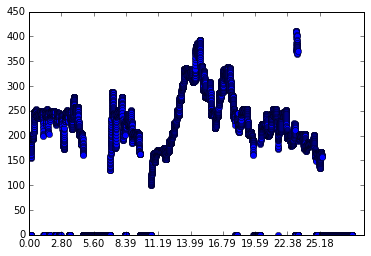

In [28]:
plot(x2)